<a href="https://colab.research.google.com/github/abhi1628/ML_DA_Exp_using_Python/blob/main/6th_SEM_DA_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exp 1- The probability that it is Friday and that a student is absent is 3%. Since there are 5 working days, the probability that it is Friday is 20%. What is the probability that the student is absent given that the day is Friday? Apply Baye's theorem.

In [ ]:
prob_absent_on_friday = 0.03
prob_day_is_friday = 0.2
bayes_result = (prob_absent_on_friday/prob_day_is_friday)
print(bayes_result*100)

15.0


## Exp 2- Create two random datsets and determine the Pearson's Correlaion between them. Also demonstrate that Null Hypothesis will be rejected or accepted based on this correlation coefficient.

In [ ]:
from numpy.random import randn, seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn (1000) + 100
data2 = data1 + (10 * randn (1000) + 50)
# calculate pearson's correlation
corr, p = pearsonr(data1, data2)
print('Pearson Correlation is:',corr*100,'%')
# interpret the significance
alpha = 0.05
if p > alpha:
  print('No Correlation. Accept the Null Hypothesis')
else:
  print('Reject the Null Hypothesis')

Pearson Correlation is: 88.76119085795308 %
Reject the Null Hypothesis


## Exp 3- Using a dataset compare multiple ROC curves in a single plot and automatically displays the AUC for each model as well.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

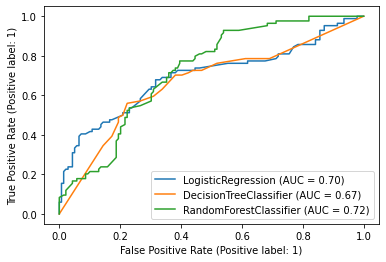

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
cols = ['Pclass', 'Fare', 'SibSp']
X = df[cols]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
disp = plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_)

## Exp 4- Using a dataset plot confusion matrix in one line of code

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


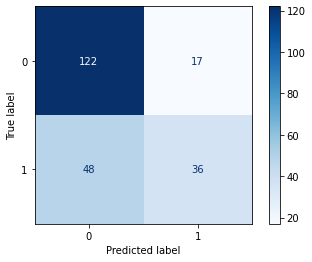

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv('http://bit.ly/kaggletrain')
cols = ['Pclass', 'Fare']
X = df[cols]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
# pass it a trained model: it makes predictions for X_test and compares them to y_test
disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='d')

In [ ]:
# print the "normal" confusion matrix
disp.confusion_matrix

array([[122,  17],
       [ 48,  36]])

## Exp 5- Use ColumnTransformer to apply different preprocessing to different columns:

* select from DataFrame columns by name
* passthrough or drop unspecified columns

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
cols = ['Fare', 'Embarked', 'Sex', 'Age']
X = df[cols]
X

,Fare,Embarked,Sex,Age
0,7.25,S,male,22.0
1,71.28,C,female,38.0
2,7.92,S,female,26.0
3,53.10,S,female,35.0
4,8.05,S,male,35.0
5,8.46,Q,male,NaN


In [ ]:
ohe = OneHotEncoder()
imp = SimpleImputer()
ct = make_column_transformer(
    (ohe, ['Embarked', 'Sex']),  # apply OneHotEncoder to Embarked and Sex
    (imp, ['Age']),              # apply SimpleImputer to Age
    remainder='passthrough')     # include remaining column (Fare) in the output
# column order: Embarked (3 columns), Sex (2 columns), Age (1 column), Fare (1 column)
ct.fit_transform(X)

array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 26.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 35.    , 53.1   ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 35.    ,  8.05  ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    , 31.2   ,  8.4583]])

## Exp 6- Using a dataset visualize a decision tree using matplotlib library.

[Text(0.5, 0.8333333333333334, 'Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Deceased'),
 Text(0.25, 0.5, 'Fare <= 26.269\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Deceased'),
 Text(0.125, 0.16666666666666666, 'gini = 0.226\nsamples = 415\nvalue = [361, 54]\nclass = Deceased'),
 Text(0.375, 0.16666666666666666, 'gini = 0.448\nsamples = 162\nvalue = [107, 55]\nclass = Deceased'),
 Text(0.75, 0.5, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Survived'),
 Text(0.625, 0.16666666666666666, 'gini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Survived'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = Deceased')]

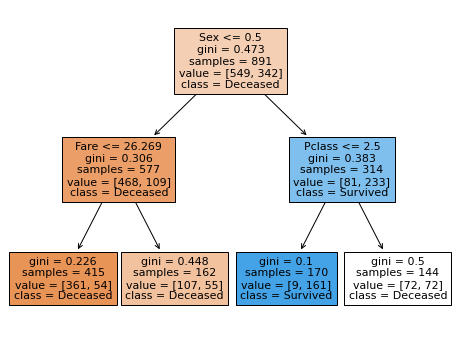

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
features = ['Pclass', 'Fare', 'Sex']
X = df[features]
y = df['Survived']
classes = ['Deceased', 'Survived']

dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X, y)
plt.figure(figsize=(8, 6))
plot_tree(dt, feature_names=features, class_names=classes, filled=True)


In [ ]:
print(export_text(dt, feature_names=features, show_weights=True))

|--- Sex <= 0.50
|   |--- Fare <= 26.27
|   |   |--- weights: [361.00, 54.00] class: 0
|   |--- Fare >  26.27
|   |   |--- weights: [107.00, 55.00] class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- weights: [9.00, 161.00] class: 1
|   |--- Pclass >  2.50
|   |   |--- weights: [72.00, 72.00] class: 0



## Exp 7- Using a dataset demonstrate how to change the display options in pandas.

In [ ]:
import pandas as pd
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
# only 60 rows will be displayed when printing
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [ ]:
# check the current setting for the 'max_rows' option
pd.get_option('display.max_rows')

60

In [ ]:
# overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows', None)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [ ]:
# reset the 'max_rows' option to its default
pd.reset_option('display.max_rows')

In [ ]:
# the 'max_columns' option is similar to 'max_rows'
pd.get_option('display.max_columns')

20

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# an ellipsis is displayed in the 'Name' cell of row 1 because of the 'max_colwidth' option
pd.get_option('display.max_colwidth')

50

In [ ]:
# overwrite the current setting so that more characters will be displayed
pd.set_option('display.max_colwidth', 1000)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# overwrite the 'precision' setting to display 2 digits after the decimal point of 'Fare'
pd.set_option('display.precision', 2)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## Exp 8- Using a dataset demonstrate how to make pandas DataFrame smaller and faster.

In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

NameError: ignored

In [ ]:
# exact memory usage is unknown because object columns are references elsewhere
drinks.info()

In [ ]:
# force pandas to calculate the true memory usage
drinks.info(memory_usage='deep')

In [ ]:
# calculate the memory usage for each Series (in bytes)
drinks.memory_usage(deep=True)

In [ ]:
# use the 'category' data type to store the 'continent' strings as integers
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

In [ ]:
# 'continent' Series appears to be unchanged
drinks.continent.head()

In [ ]:
# strings are now encoded (0 means 'Africa', 1 means 'Asia', 2 means 'Europe', etc.)
drinks.continent.cat.codes.head()

In [ ]:
# memory usage has been drastically reduced
drinks.memory_usage(deep=True)